In [ ]:
# Data visualization
# BTech Computer Science Stream, January 2025
# Week 10 & 11 - Time Series Case Study 
# Name: Oswin Vion Dsilva, 240905268, Section CE, Date: 26/03/2024

# Importing libraries

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


# Loading the csv data into dataframes

In [2]:
# Loading the data 

var_dfStocks = pd.read_csv("nvidia_stock_data.csv")

var_dfStocks

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2023,14.851000,14.996000,14.096000,14.315000,14.305580,401277000
1,04-01-2023,14.567000,14.853000,14.241000,14.749000,14.739294,431324000
2,05-01-2023,14.491000,14.564000,14.148000,14.265000,14.255614,389168000
3,06-01-2023,14.474000,15.010000,14.034000,14.859000,14.849222,405044000
4,09-01-2023,15.284000,16.056000,15.141000,15.628000,15.617717,504231000
...,...,...,...,...,...,...,...
432,23-09-2024,116.550003,116.989998,114.860001,116.260002,116.260002,206228500
433,24-09-2024,116.519997,121.800003,115.379997,120.870003,120.870003,354966800
434,25-09-2024,122.019997,124.940002,121.610001,123.510002,123.510002,284692900
435,26-09-2024,126.800003,127.669998,121.800003,124.040001,124.040001,302582900


### The given data consists of NVIDIA Stock prices with their respective dates.
### Open - Represents the Stock price at the Opening of the market for the day
### High - Represents the peak value of Stock price during the day.
### Low - Represents the bottom value of Stock price during the day.
### Close - Represents the Stock price at the Closing of the market
### Adj Close - Stands for Adjusted Close. It represents the closing Stock price after it is adjusted for various corporate factors like dividends etc.

# Section 1 : Exploratory Analysis

In [3]:
# Checking Data types and presence of null values

var_dfStocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       437 non-null    object 
 1   Open       437 non-null    float64
 2   High       437 non-null    float64
 3   Low        437 non-null    float64
 4   Close      437 non-null    float64
 5   Adj Close  437 non-null    float64
 6   Volume     437 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 24.0+ KB


### The date column does not have the datetime datatype

In [4]:
# Checking general statistics of the data

var_dfStocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,437.000000,437.000000,437.000000,437.000000,437.000000,4.370000e+02
mean,62.618792,63.795366,61.340346,62.635151,62.621695,4.554760e+08
std,34.893995,35.606990,33.951698,34.782847,34.783928,1.582334e+08
min,14.474000,14.564000,14.034000,14.265000,14.255614,1.739110e+08
25%,40.097000,40.500000,39.057999,39.770000,39.750576,3.610260e+08
50%,47.500000,48.230000,46.742001,47.506001,47.495808,4.277170e+08
75%,90.000000,91.300003,88.400002,90.356003,90.340851,5.136480e+08
max,139.800003,140.759995,132.419998,135.580002,135.568405,1.543911e+09


In [5]:
# Checking correlation between Features

var_corrtable = var_dfStocks.drop(columns='Date').corr()

var_corrtable

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999481,0.999195,0.998373,0.998374,-0.236770
High,0.999481,1.000000,0.999227,0.999178,0.999178,-0.231739
Low,0.999195,0.999227,1.000000,0.999437,0.999437,-0.248164
Close,0.998373,0.999178,0.999437,1.000000,1.000000,-0.242566
Adj Close,0.998374,0.999178,0.999437,1.000000,1.000000,-0.242597
Volume,-0.236770,-0.231739,-0.248164,-0.242566,-0.242597,1.000000


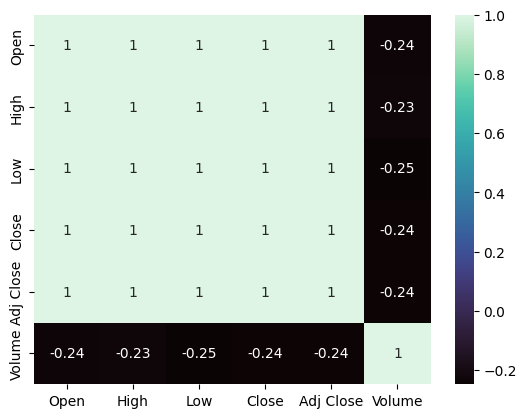

In [6]:
# Visualising the correlations

sns.heatmap(data = var_corrtable,annot = True, cmap='mako')
plt.show()

## The above heatmap shows that the Trading Volume has a bad correlation with all the other features, while the other features tend to have a good correlation amongst themselves. This would usually be the case since the prices of the next day are dependent on the prices of the previous day.

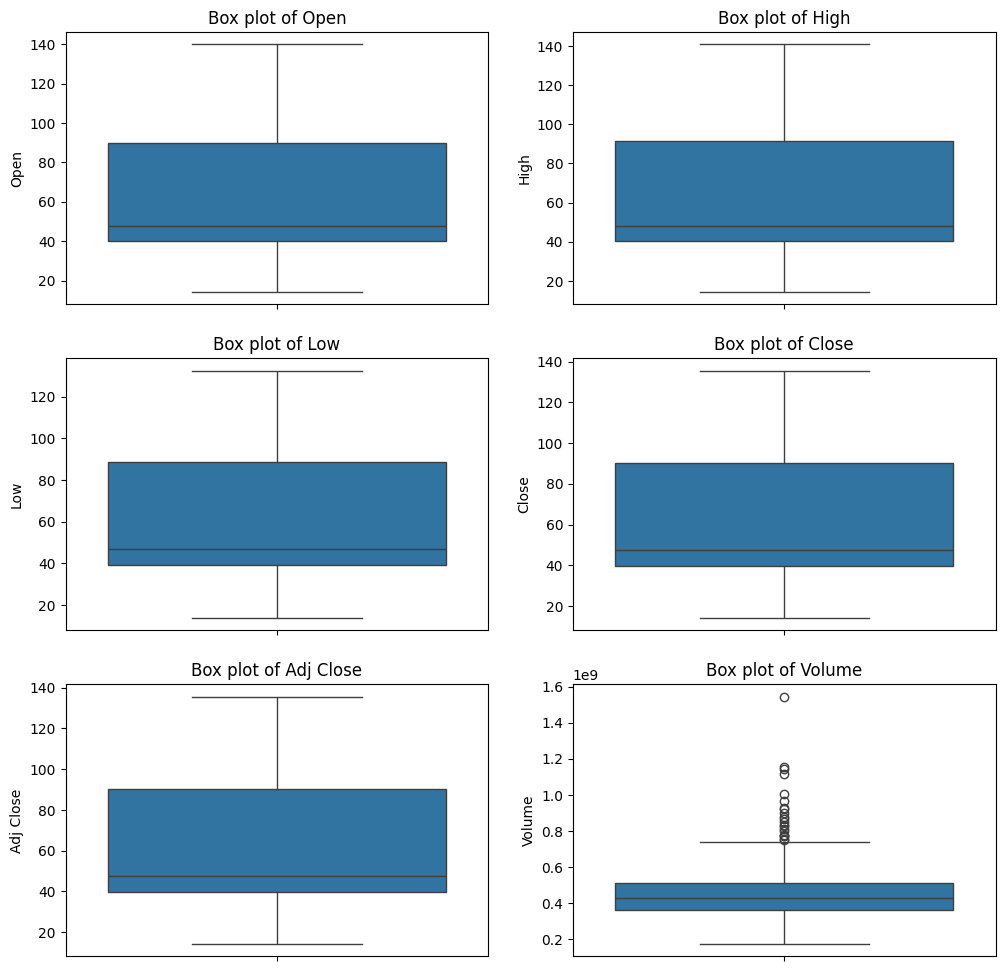

In [12]:
# Box plot to gauge the data
fig, axBox = plt.subplots(3,2,figsize = (12,12))
axBox = axBox.flatten()
var_plot_num = 0
for col in ['Open','High','Low','Close','Adj Close','Volume']:
    sns.boxplot(data = var_dfStocks[col], ax = axBox[var_plot_num])
    axBox[var_plot_num].set_title(f"Box plot of {col}")
    var_plot_num += 1
plt.show()

### The Volume column seems to have a lot of outlier points. However considering that the correlation of Volume is very low with other columns, this may be the normal values

## At the end of the Exploratory analysis, 
### - It is evident that the data set does not contain null values. 
### - There seem to be outliers only in the Volume column, but that may be due to the nature of the data set. 
### - The Date column does not have the date time data type.

## These issues will be addressed in the next Section

# Section 2 : Data Pre-processing

In [ ]:
# Converting the date into a date object type

var_dfStocks['Date'] = pd.to_datetime(var_dfStocks['Date'],dayfirst = True).dt.date

var_dfStocks.info()

 ### The Date column now has the correct Data type

In [ ]:
# Function to split the data into year , month and day

def date_split(df):
    df[['Day','Month','Year']] = df['Date'].str.split('-', expand = True).astype('int64')
    
    return df


In [ ]:
# Splitting the date using the function

var_dfStocks = date_split(var_dfStocks)

var_dfStocks

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year
0,03-01-2023,14.851000,14.996000,14.096000,14.315000,14.305580,401277000,3,1,2023
1,04-01-2023,14.567000,14.853000,14.241000,14.749000,14.739294,431324000,4,1,2023
2,05-01-2023,14.491000,14.564000,14.148000,14.265000,14.255614,389168000,5,1,2023
3,06-01-2023,14.474000,15.010000,14.034000,14.859000,14.849222,405044000,6,1,2023
4,09-01-2023,15.284000,16.056000,15.141000,15.628000,15.617717,504231000,9,1,2023
...,...,...,...,...,...,...,...,...,...,...
432,23-09-2024,116.550003,116.989998,114.860001,116.260002,116.260002,206228500,23,9,2024
433,24-09-2024,116.519997,121.800003,115.379997,120.870003,120.870003,354966800,24,9,2024
434,25-09-2024,122.019997,124.940002,121.610001,123.510002,123.510002,284692900,25,9,2024
435,26-09-2024,126.800003,127.669998,121.800003,124.040001,124.040001,302582900,26,9,2024


### Feature Engineering the date into it's respective Day, Month and Year to be able to visual data more concisely if necessary

In [ ]:
# Calculating the daily change for each day

var_dfStocks['Net_Change'] = var_dfStocks['Close'] - var_dfStocks['Open']

var_dfStocks['Net_Change']

0     -0.536000
1      0.181999
2     -0.226000
3      0.385000
4      0.344000
         ...   
432   -0.290001
433    4.350006
434    1.490005
435   -2.760002
436   -2.570000
Name: Net_Change, Length: 437, dtype: float64

In [ ]:
# Labelling as Increase or Decrease for the day

var_dfStocks['Net'] = np.where(var_dfStocks['Net_Change'] >= 0 , 'Gain','Loss')

var_dfStocks

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,Net_Change,Net
0,2023-01-03,14.851000,14.996000,14.096000,14.315000,14.305580,401277000,3,1,2023,-0.536000,Loss
1,2023-01-04,14.567000,14.853000,14.241000,14.749000,14.739294,431324000,4,1,2023,0.181999,Gain
2,2023-01-05,14.491000,14.564000,14.148000,14.265000,14.255614,389168000,5,1,2023,-0.226000,Loss
3,2023-01-06,14.474000,15.010000,14.034000,14.859000,14.849222,405044000,6,1,2023,0.385000,Gain
4,2023-01-09,15.284000,16.056000,15.141000,15.628000,15.617717,504231000,9,1,2023,0.344000,Gain
...,...,...,...,...,...,...,...,...,...,...,...,...
432,2024-09-23,116.550003,116.989998,114.860001,116.260002,116.260002,206228500,23,9,2024,-0.290001,Loss
433,2024-09-24,116.519997,121.800003,115.379997,120.870003,120.870003,354966800,24,9,2024,4.350006,Gain
434,2024-09-25,122.019997,124.940002,121.610001,123.510002,123.510002,284692900,25,9,2024,1.490005,Gain
435,2024-09-26,126.800003,127.669998,121.800003,124.040001,124.040001,302582900,26,9,2024,-2.760002,Loss


### Finding the Daily Returns and Labelling the Trades for the Day as Gain or Loss in order to be able to better sort the data

## At the end of the Data Pre Processing section,
### - The Date column now has the correct data type
### - New Columns have been added to be able to visual data more concisely and easily

# Section 3 : Data visualization

## In this section, The data will be visualised using Matplotlib and Seaborn libraries.
## In this case, statisticsmodels library has also been used to make use of the time series decomposition function.

In [ ]:
# Function to plot candlestick plot for any given dataframe

def plot_candlestick(df,w1,w2):
    var_dfGain = df[df['Net'] == "Gain"]

    var_dfLoss = df[df['Net'] == "Loss"]

    var_Color_up = 'green'
    var_Color_down = 'red'

    width1 = w1
    width2 = w2

    
    plt.figure(figsize=(8,8))

    # Plotting the Net Increase values
    ## Plotting the Net value change whose width should be the closing value - opening value, but should go above the opening values since this is for Gain
    plt.bar(var_dfGain.Date, var_dfGain.Close - var_dfGain.Open, width1, bottom = var_dfGain.Open, color = var_Color_up)

    ## Plotting the thin bars representing the peak value 
    plt.bar(var_dfGain.Date, var_dfGain.High - var_dfGain.Close , width2, bottom = var_dfGain.Close, color = var_Color_up)

    ## Plotting the thin bars representing the lowest value
    plt.bar(var_dfGain.Date, var_dfGain.Low - var_dfGain.Open, width2, bottom = var_dfGain.Open, color = var_Color_up)

    # Plotting the Net Decrease values
    ## Plotting the Net value change whose width should be the opening value - closing value but should go below the opening values since this is for Loss
    plt.bar(var_dfLoss.Date, var_dfLoss.Close - var_dfLoss.Open, width1, bottom = var_dfLoss.Open, color = var_Color_down)

    ## Plotting the thin bars representing the peak value
    plt.bar(var_dfLoss.Date, var_dfLoss.High - var_dfLoss.Open, width2, bottom = var_dfLoss.Open, color = var_Color_down)

    ## Plotting the thin bars representing the lowest value
    plt.bar(var_dfLoss.Date, var_dfLoss.Low - var_dfLoss.Close, width2, bottom = var_dfLoss.Close, color = var_Color_down)

    gain_patch = mpatches.Patch(color = 'green', label='Gain')
    loss_patch = mpatches.Patch(color = 'red', label = 'Loss')
    
    plt.legend(handles = [gain_patch,loss_patch])
    plt.xticks(rotation=45)
    plt.xlabel("Date")
    plt.ylabel("Stock Price")


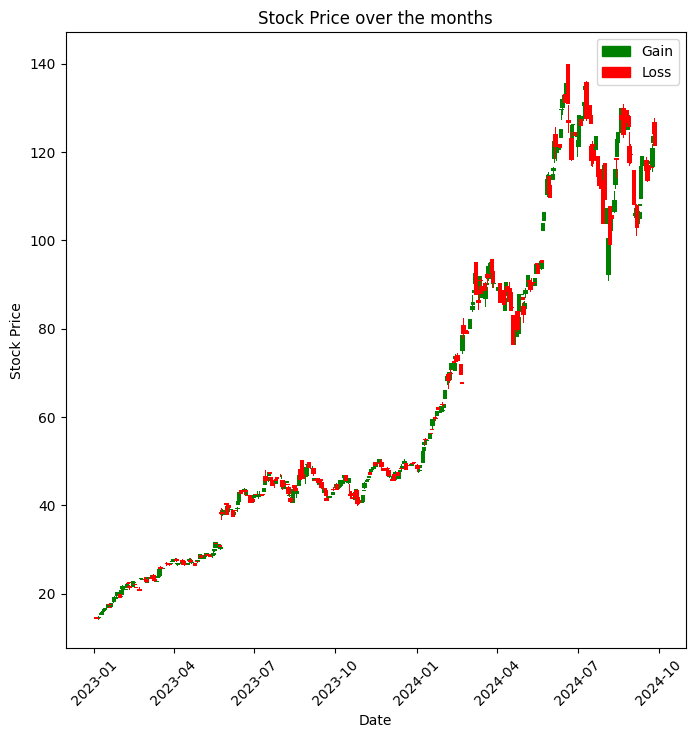

In [ ]:
# 1. Visualise the daily returns for the entire time period

# Plotting
plot_candlestick(var_dfStocks,5,0.5)
plt.title("Stock Price over the months")
plt.show()

### As we can see, the graph tends be increasing. However, there are breakages in the graph .
### This is mainly due to 2 reasons:
### 1. Share market unavailable on those days
### 2. After hour/pre-market trading 

### A better analysis would be visualizing the month by month candle stick graphs for each year 

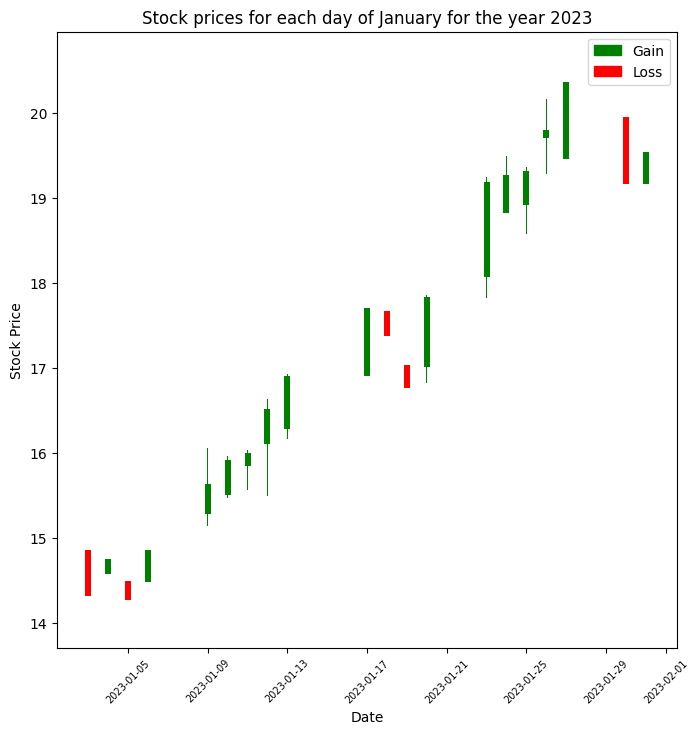

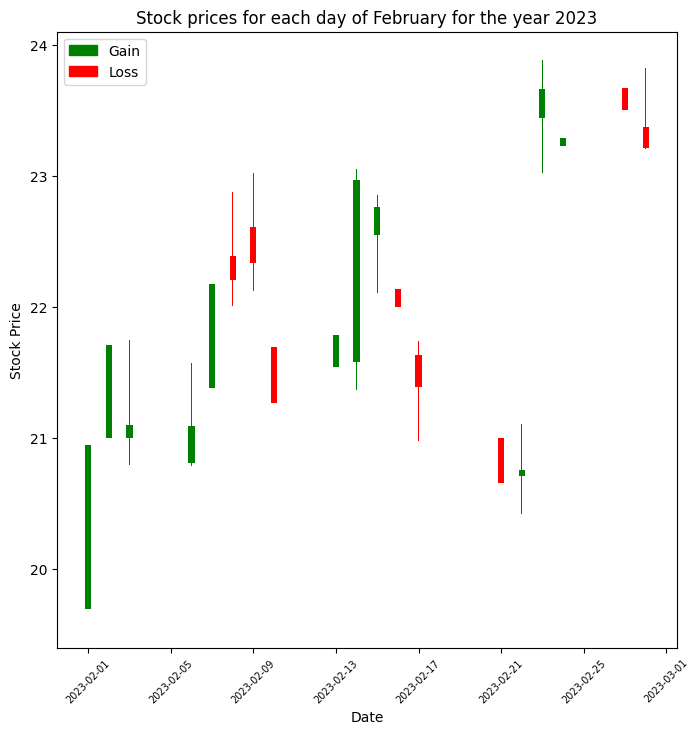

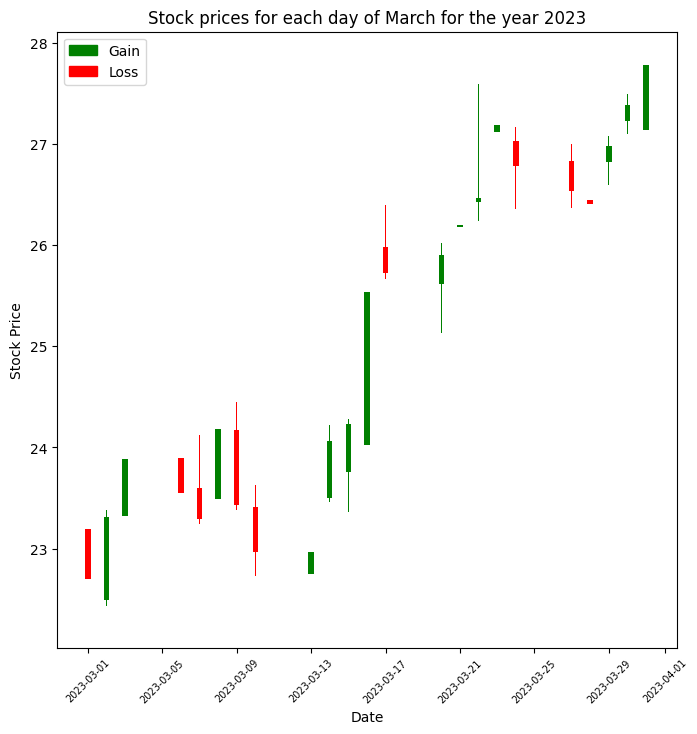

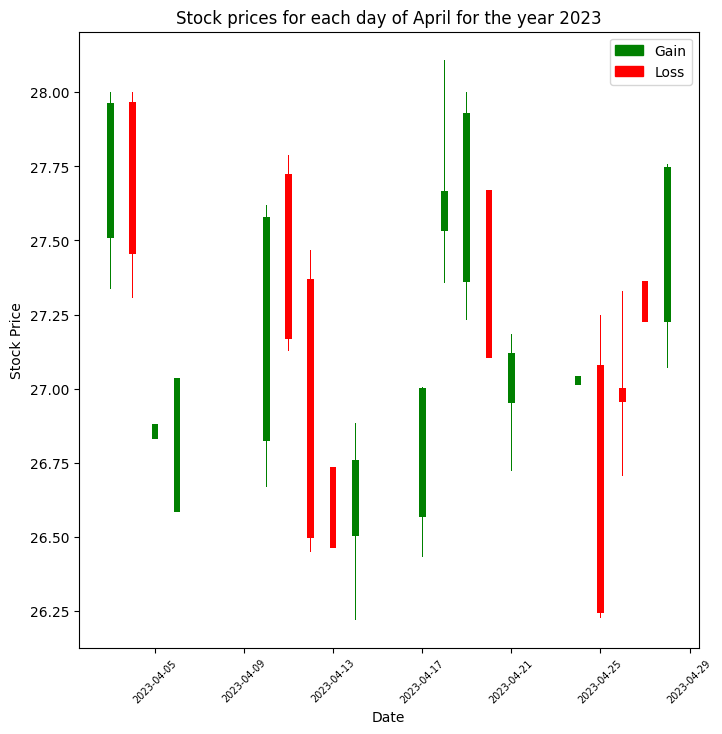

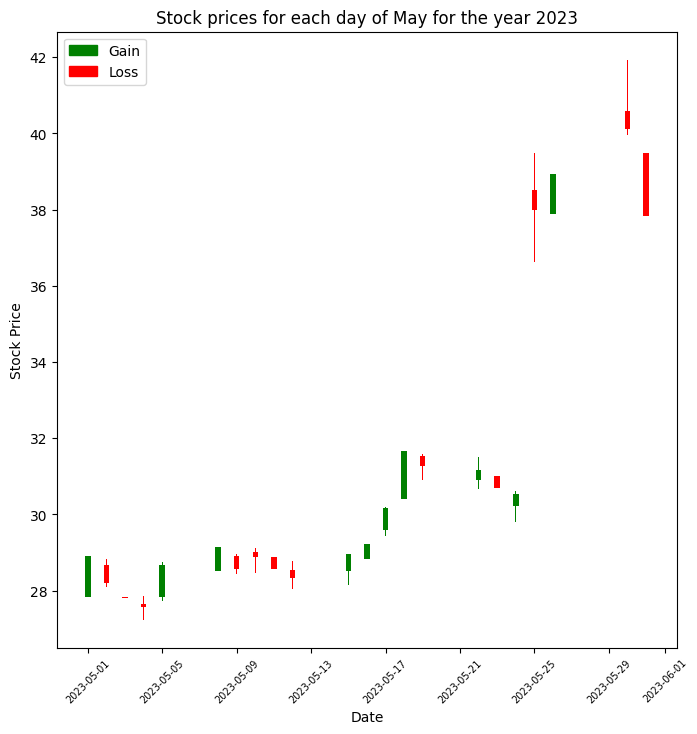

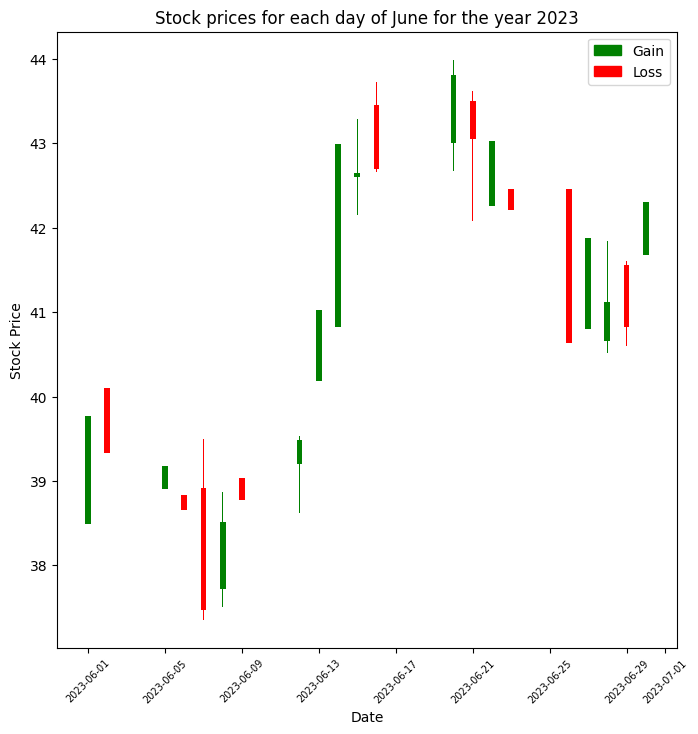

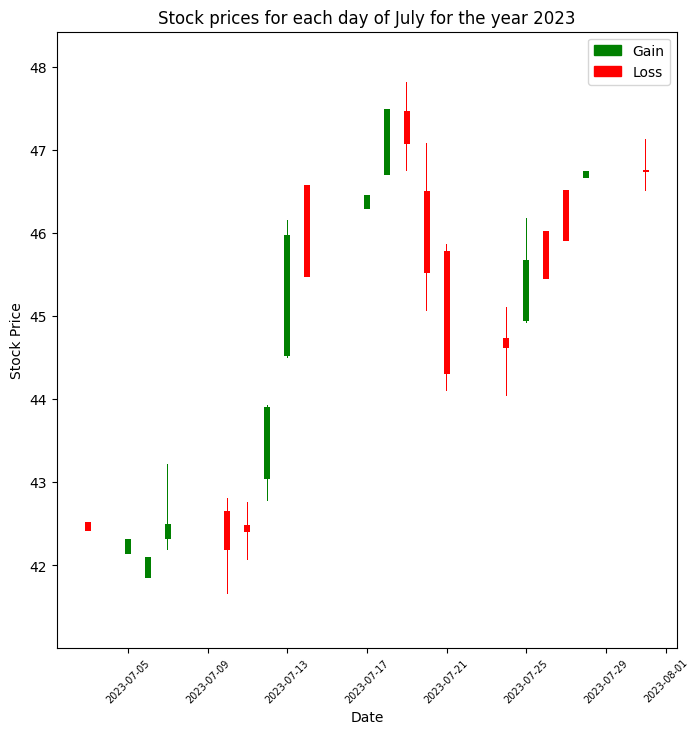

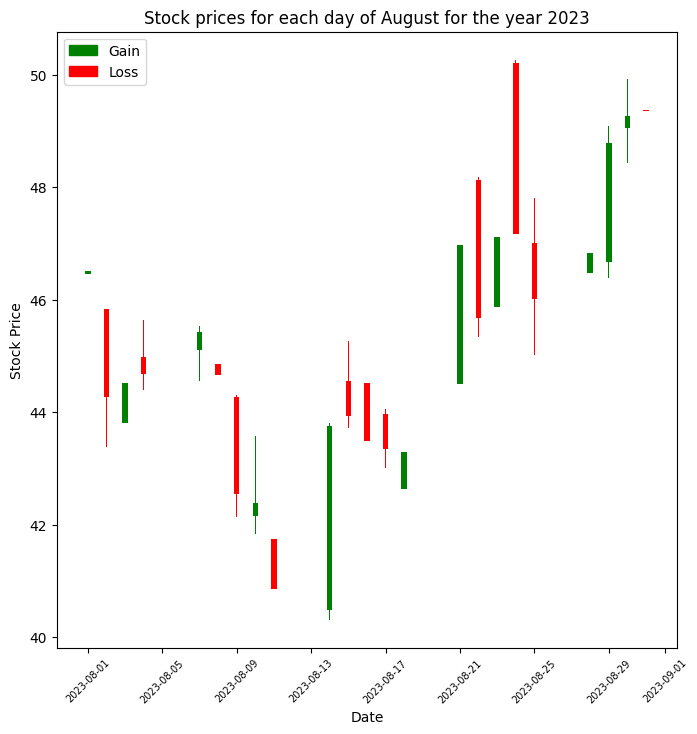

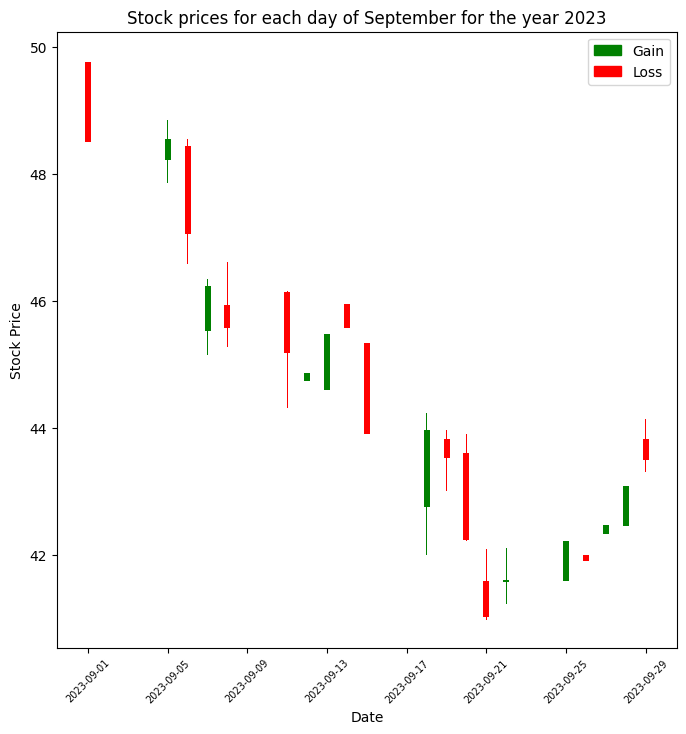

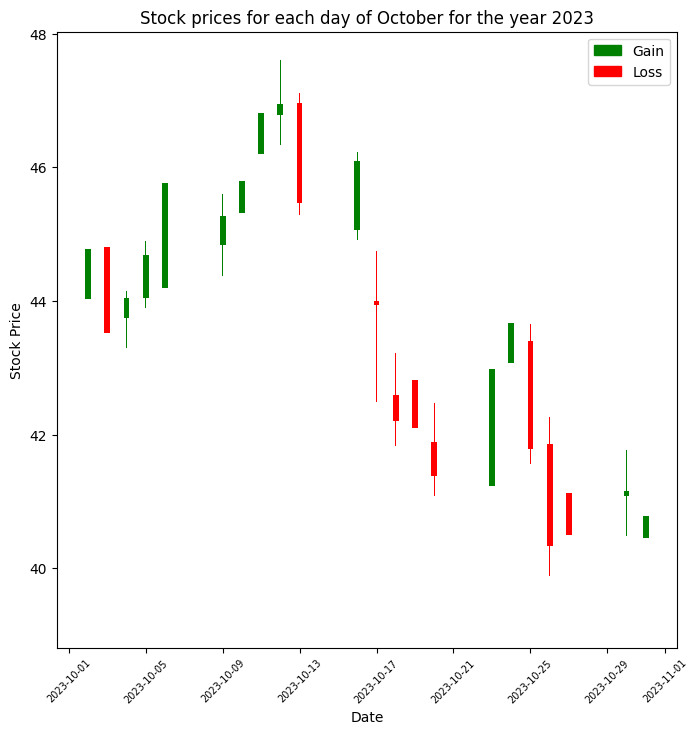

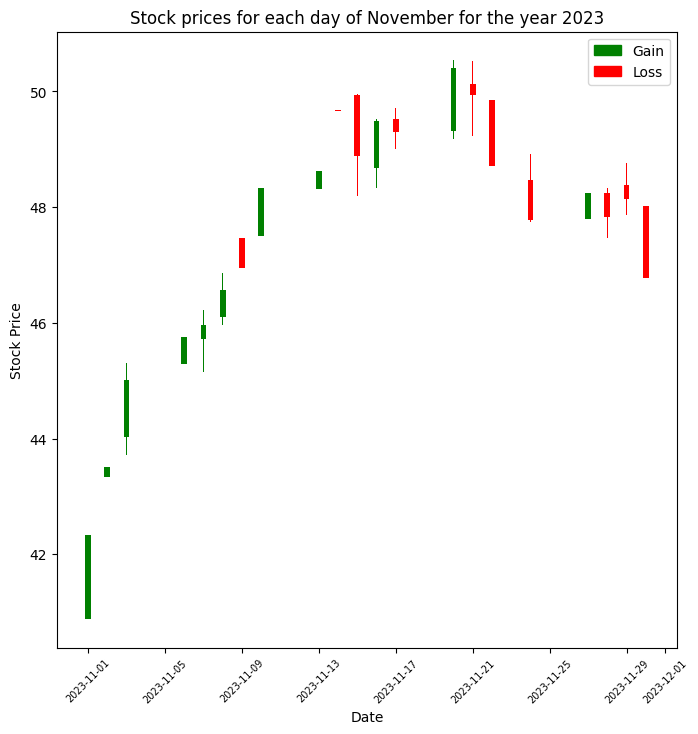

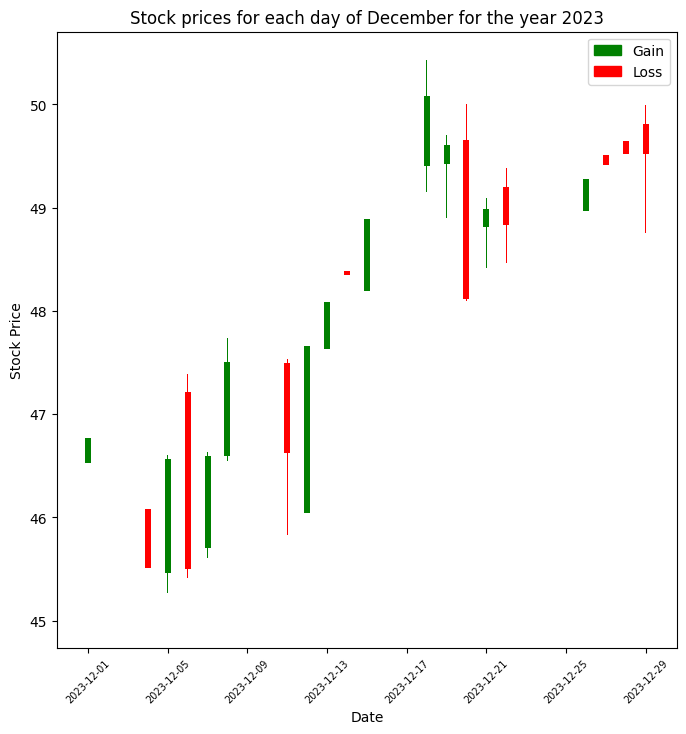

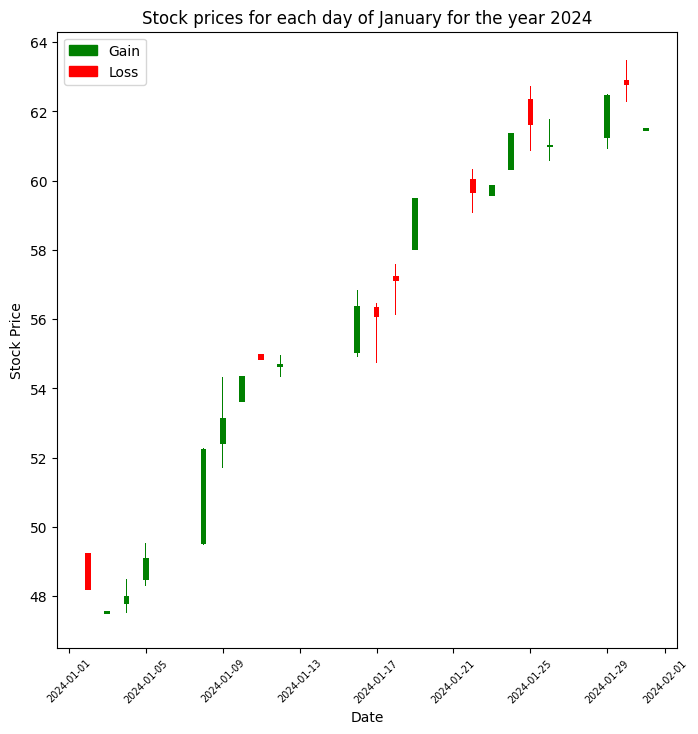

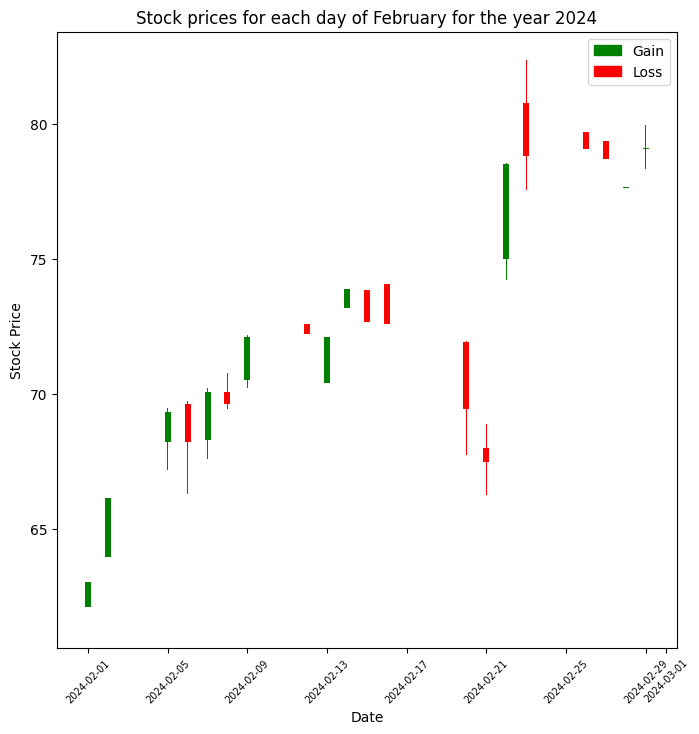

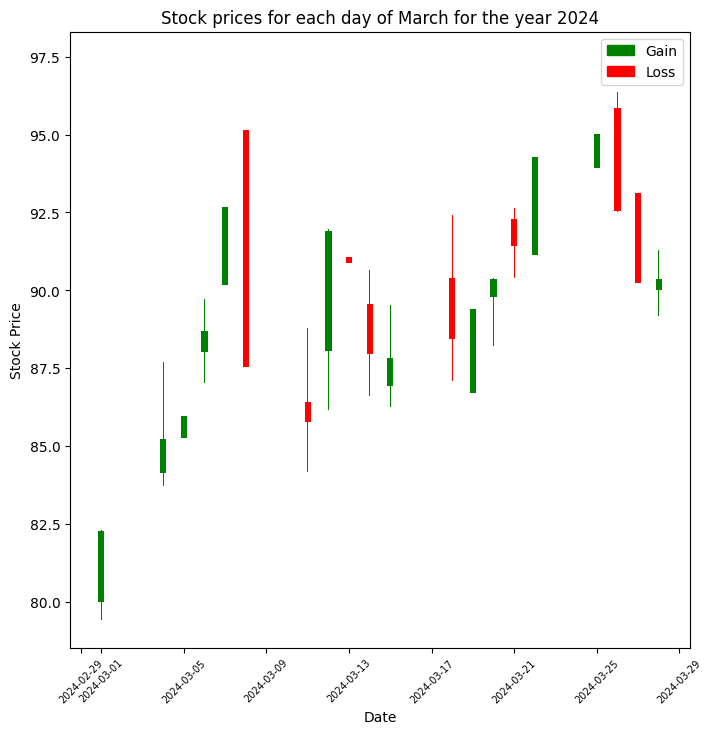

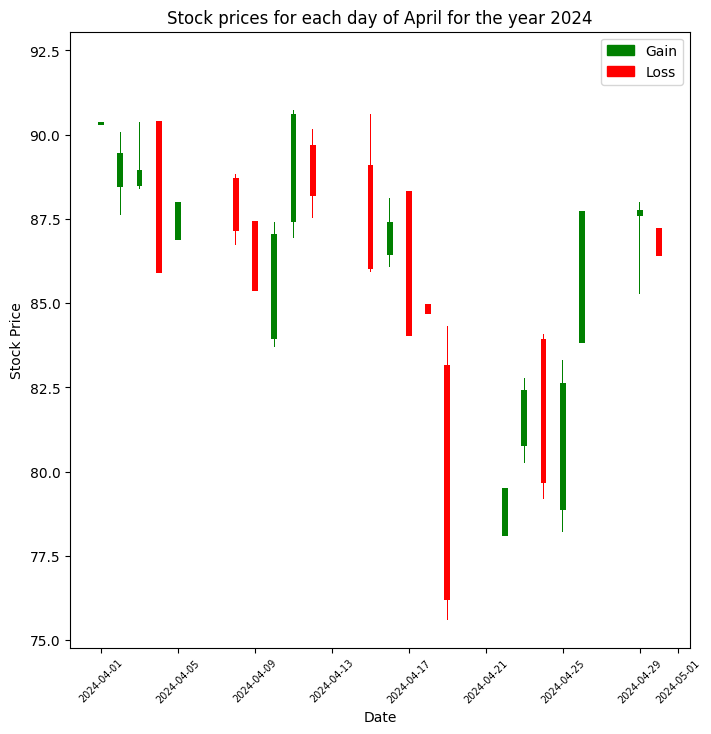

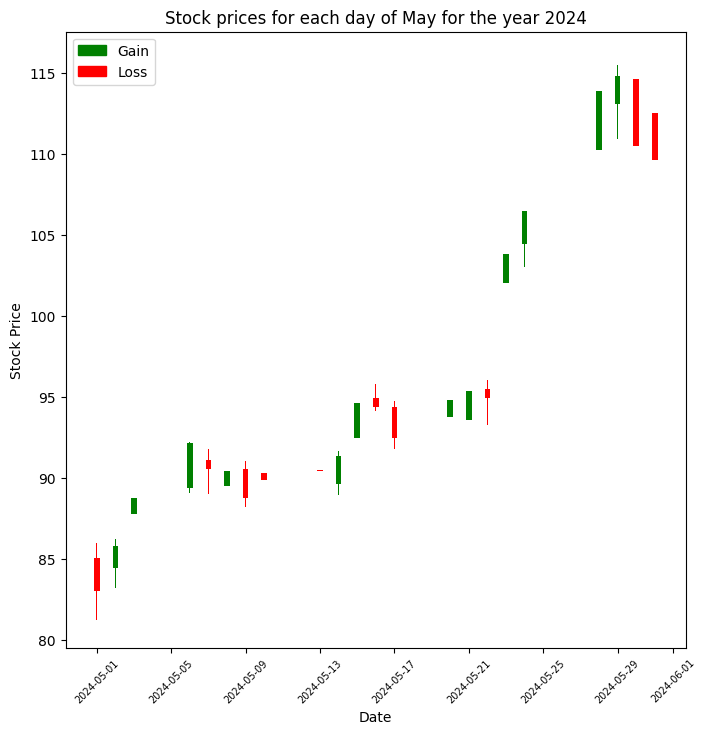

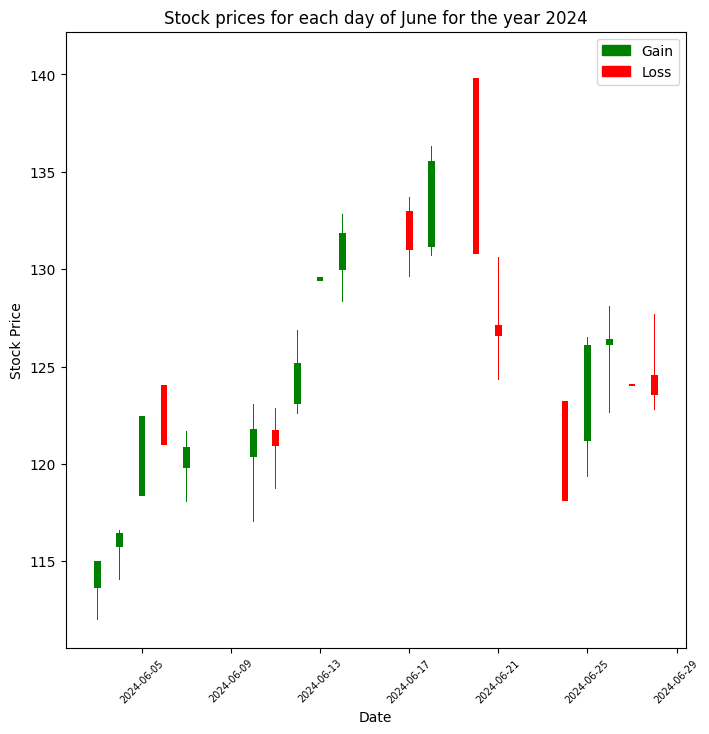

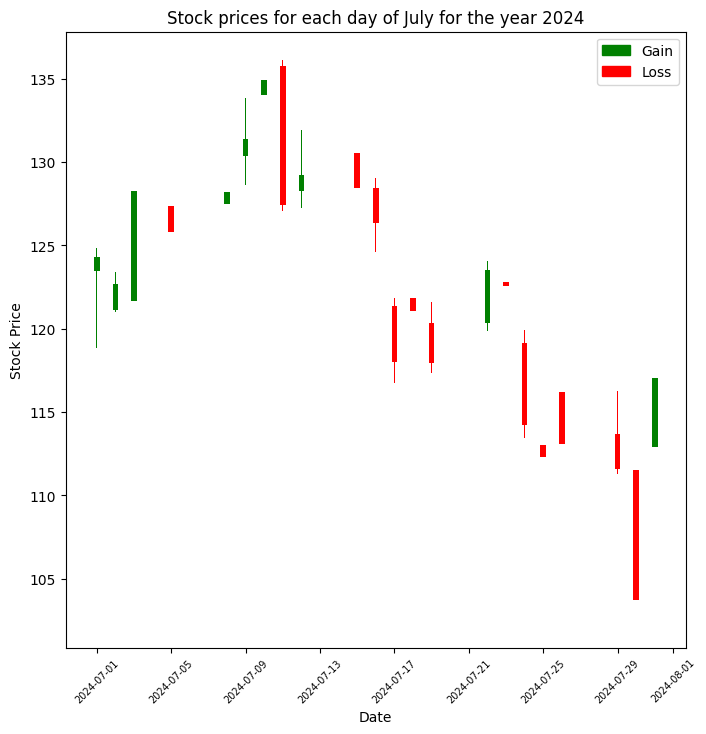

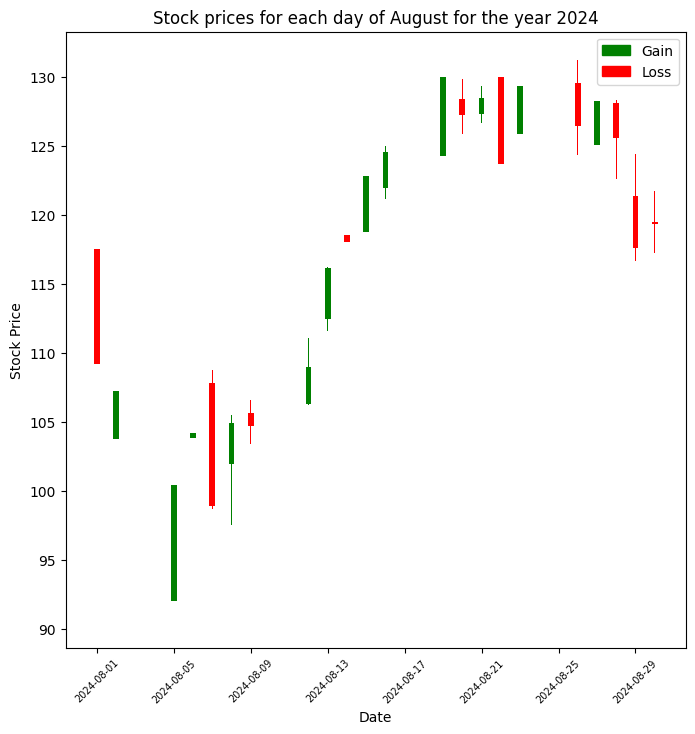

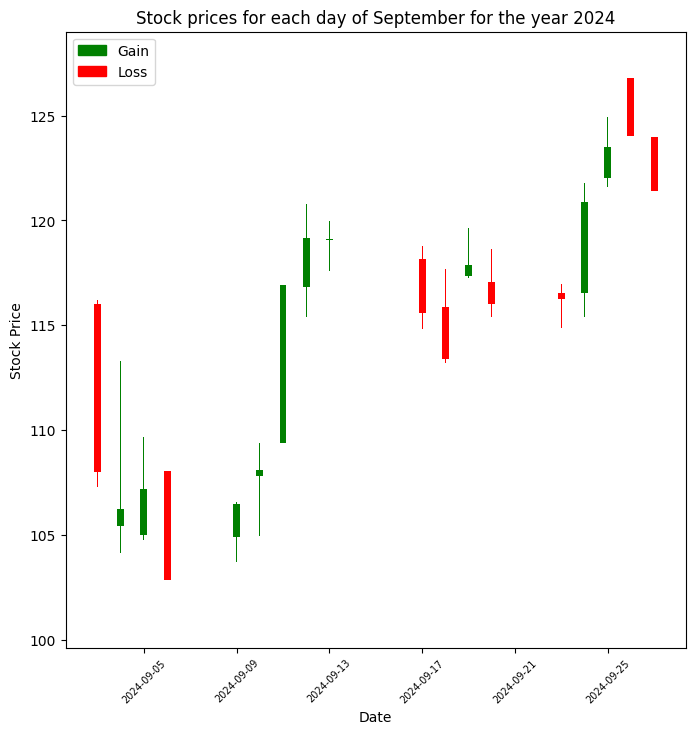

In [ ]:
# 2. Visualise the daily returns on a month by month basis

var_mapNumberToMonth = {
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'}



for year in var_dfStocks['Year'].unique():
    for month in var_dfStocks['Month'].unique():
        
        var_dfPlotting = var_dfStocks[(var_dfStocks['Month'] == month) & (var_dfStocks['Year'] == year)]
        
        if(var_dfPlotting.empty):
            break
            
        plot_candlestick(var_dfPlotting,0.3,0.03)
        month = var_mapNumberToMonth[month]
        plt.title(f"Stock prices for each day of {month} for the year {year}")
        plt.xticks(size = 7)
        plt.show()

### These graphs above show that the stock price does, in fact, somewhat rely on the time of year and/or the months.
### For instance, the stock price has primarily increased in the start of the year and towards the conclusion of the year. There is a sort of cyclical behaviour that goes up and down over the other months.
### The majority of months have had a net rise in the stock price from the beginning to the conclusion of the month.

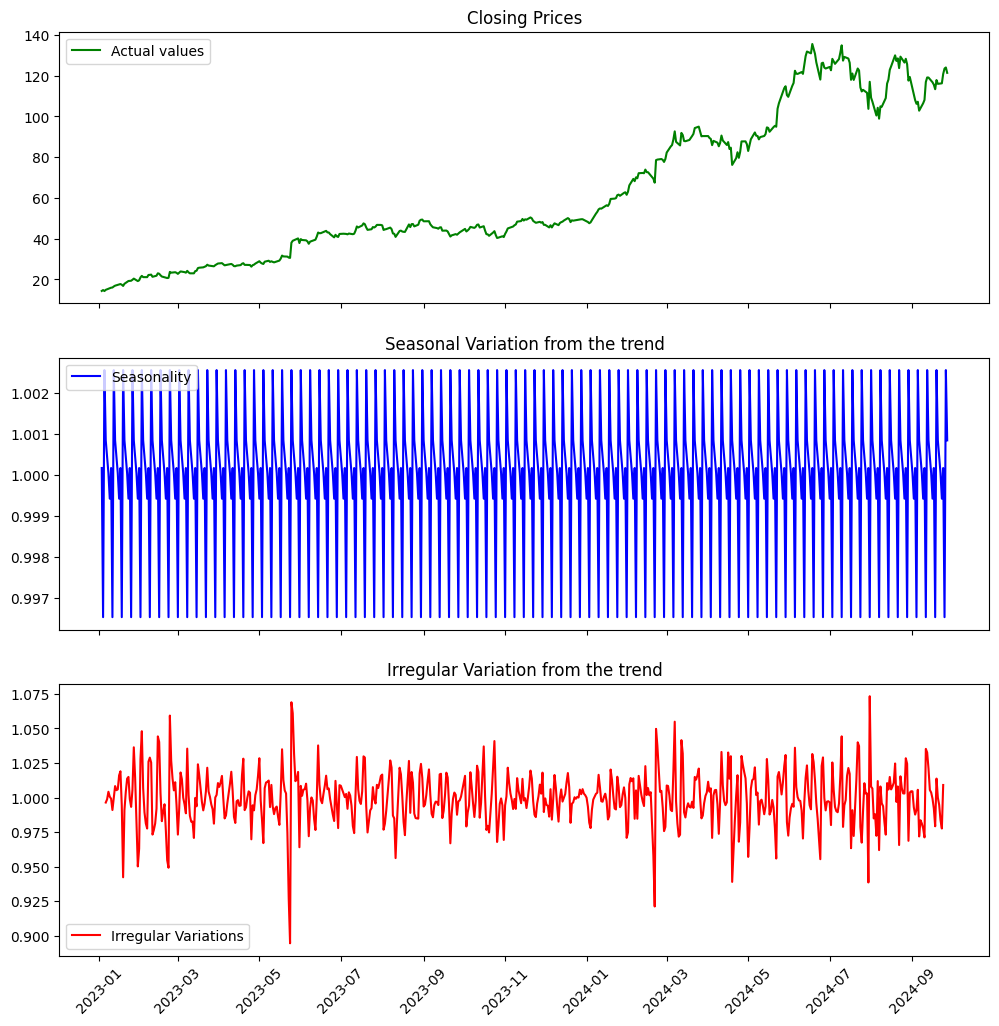

In [ ]:
# 3. Visualise the seasonality and Irregular variations of the dataset 

var_dfSeasonality = var_dfStocks.set_index('Date')

var_dfSeasonality = var_dfSeasonality.asfreq('D')
var_dfSeasonality['Close'] = var_dfSeasonality['Close'].interpolate()


result = seasonal_decompose(var_dfSeasonality['Close'],model='multiplicative')

fig, axes = plt.subplots(3,1,sharex=True)
fig.set_size_inches(12,12)
axes[0].plot(var_dfStocks['Date'],var_dfStocks['Close'], label = "Actual values", color = 'green')
axes[0].set_title("Closing Prices")
axes[0].legend()

axes[1].plot(result.seasonal, label = "Seasonality", color = 'blue')
axes[1].set_title("Seasonal Variation from the trend")
axes[1].legend()

axes[2].plot(result.resid, label = 'Irregular Variations', color = 'red')
axes[2].set_title("Irregular Variation from the trend")
axes[2].legend()
axes[2].tick_params(axis = 'x',rotation = 45)
plt.show()

### The graphs above represent the decomposition of the original time series using multiplicative decomposition. In this case, the variations are centered around 1. Values greater than 1 indicate that the seasonal variations contribute to an increase, while values below 1 suggest that they lead to a decrease.
### The time series is primarily decomposed into three main components: Seasonality, Trend, and Irregular/Random Variations.
### - Seasonality represents a recurring cyclic pattern that appears consistently over time. In this case, the seasonal pattern has a periodicity of approximately one-fourth of a month. While this seasonality is present in the original time series, it may be less noticeable due to the influence of irregular variations, cyclic fluctuations, or because the seasonal effect itself is relatively small. For instance, a seasonality value of 1.002 suggests that the seasonal effect contributes to a 0.2% increase in stock prices.
### - Irregular variations represent unpredictable patterns that occur randomly. In this case, these variations arise from the inherent uncertainty of the stock market. However, some of the larger irregularities are likely due to missing data, often caused by markets being unavailable on certain days.

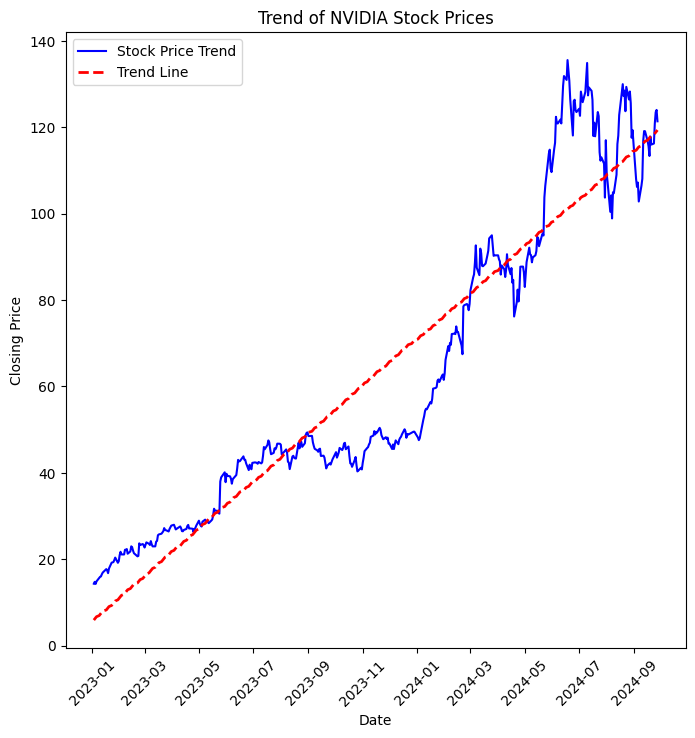

In [ ]:
# 4. What is the overall trend of NVIDIA's stock price over the years?

# Getting an enumeration array
var_Len = np.arange(len(var_dfStocks))  

# Getting the parameters for the trend line
m, b = np.polyfit(var_Len, var_dfStocks['Close'], 1)  # 1st-degree polynomial (y = mx + b)

plt.figure(figsize=(8,8))

# Plotting the Stock closing Prices
plt.plot(var_dfStocks['Date'], var_dfStocks['Close'], label='Stock Price Trend', color='blue')

# Plotting the trend line
plt.plot(var_dfStocks['Date'], m * var_Len + b, color='red', linestyle='dashed', linewidth=2, label='Trend Line')

plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Trend of NVIDIA Stock Prices")
plt.legend()
plt.xticks(rotation=45)
plt.show()


### The graph above illustrates the trend in stock prices, which is one of the key components of time series decomposition.
### The trend represents the overall direction of the time series. It can be increasing, indicating a general upward movement, decreasing, showing a downward trend, or flat, meaning that increases and decreases balance out over time. 
### This trend line confirms that stock prices have shown a general upward movement over time.

In [ ]:
# 5. Identify the highest and lowest stock prices in the dataset.

var_HighestClose = var_dfStocks['Close'].max()
var_LowestClose = var_dfStocks['Close'].min()

var_HighestAdjClose = var_dfStocks['Adj Close'].max()
var_LowestAdjClose = var_dfStocks['Adj Close'].min()

var_HighestOpen = var_dfStocks['Open'].max()
var_LowestOpen = var_dfStocks['Open'].min()

mapping = {
    'Close':[var_HighestClose,var_LowestClose],
    'Adj Close':[var_HighestAdjClose,var_LowestAdjClose],
    'Open':[var_HighestOpen,var_LowestOpen]
    }

for col in ['Close','Adj Close','Open']:
    var_dateHighest = var_dfStocks.loc[var_dfStocks[col] == mapping[col][0],'Date'].values[0]
    var_dateLowest = var_dfStocks.loc[var_dfStocks[col] == mapping[col][1],'Date'].values[0]

    print(f"Highest {col} = {mapping[col][0]} on {var_dateHighest}")
    print(f"Lowest {col} = {mapping[col][1]} on {var_dateLowest} \n")

Highest Close = 135.5800018310547 on 2024-06-18
Lowest Close = 14.265000343322754 on 2023-01-05 

Highest Adj Close = 135.5684051513672 on 2024-06-18
Lowest Adj Close = 14.255614280700684 on 2023-01-05 

Highest Open = 139.8000030517578 on 2024-06-20
Lowest Open = 14.473999977111816 on 2023-01-06 



### The stock's highest opening price was 139.8 on 20th June 2024, while the lowest opening price was 14.47 6th January 2024.
### The highest closing price was 135.58 on 18th June 2024, and the lowest closing price was 14.265 on 5th January 2023.
### After adjustments, the highest adjusted closing price was 135.5684 on 18th June 2024, and the lowest adjusted closing price was 14.2556 on 5th January 2023.

## It can be observed that the lowest stock prices are typically recorded in January, while the highest stock prices tend to occur in June.

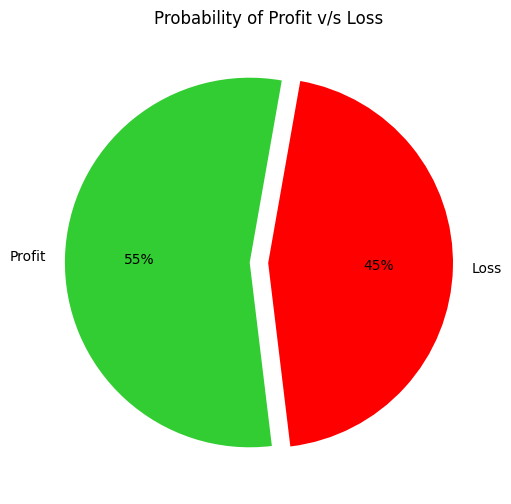

In [ ]:
# 6. Visualise the chances of getting a Profit or Loss assuming you buy on the opening price and sell on the closing price

# Getting a dataframe with True or False values
var_dfProfit = var_dfStocks['Net'] == 'Gain'
var_dfProfit = var_dfProfit.value_counts(normalize = True)   

# Plotting a pie chart
plt.figure(figsize=(6,6))
plt.pie(var_dfProfit, labels = ['Profit','Loss'], explode = [0.1,0], startangle = 80, autopct='%.0f%%', colors=['limegreen','red'])
plt.title("Probability of Profit v/s Loss")
plt.show()

### The pie chart indicates that, on average, an investor has approximately a 55% chance of earning a positive return on their investment, compared to a 45% chance of experiencing a loss based on daily stock price changes.

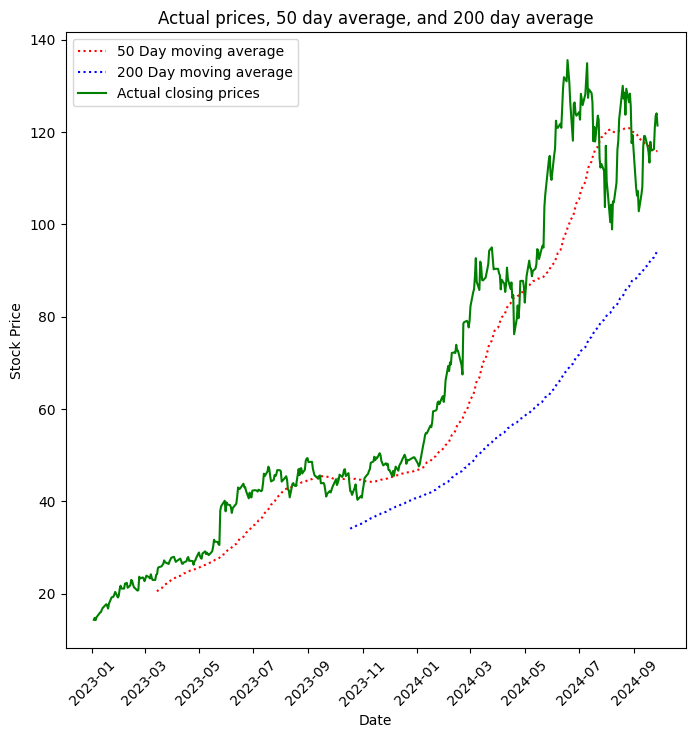

In [ ]:
# 7. Compute the 50-day and 200-day moving averages and plot the moving averages 

# Calculates the mean of every 50 data points
var_50dayavg = var_dfStocks['Close'].rolling(window=50).mean()

# Calculates the mean of every 200 data points
var_200dayavg = var_dfStocks['Close'].rolling(window=200).mean()

# Plotting
plt.figure(figsize=(8,8))
plt.plot(var_dfStocks['Date'],var_50dayavg, color = 'red', label = '50 Day moving average', linestyle = ':')
plt.plot(var_dfStocks['Date'],var_200dayavg, color = 'blue', label = '200 Day moving average', linestyle = ':')
plt.plot(var_dfStocks['Date'],var_dfStocks['Close'], color = 'green', label = 'Actual closing prices')
plt.title("Actual prices, 50 day average, and 200 day average")
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### The graph shows a general upward trend in stock prices. However, toward the end, the 50-day moving average starts to decline. If this decline continues and the 50-day MA crosses below the 200-day MA, it could indicate the potential start of a downward trend in stock prices.

In [ ]:
# 8. Calculate the daily percentage change in stock price, plot a daily returns histogram, and interpret the results.

# The daily change was pre calculated in the data pre processing step

var_DailyChangePercentage = (var_dfStocks['Net_Change']/var_dfStocks['Open'])*100

var_DailyChangePercentage

0     -3.609186
1      1.249394
2     -1.559588
3      2.659944
4      2.250719
         ...   
432   -0.248821
433    3.733270
434    1.221116
435   -2.176658
436   -2.073082
Length: 437, dtype: float64

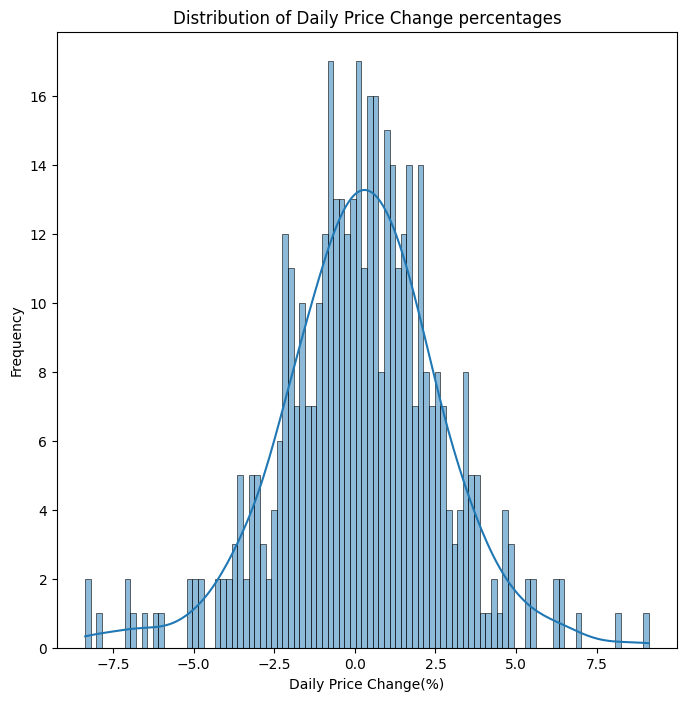

In [ ]:
# Histogram plot 

plt.figure(figsize=(8,8))
sns.histplot(data = var_DailyChangePercentage, bins = 100, kde= True)
plt.title("Distribution of Daily Price Change percentages")
plt.xlabel("Daily Price Change(%)")
plt.ylabel("Frequency")
plt.show()

### The distribution of daily change percentages appears to follow a normal distribution, suggesting that the market exhibits stable and predictable price movements over time.

Correlation between Trading volume and Stock price movements:-0.059080050881804035


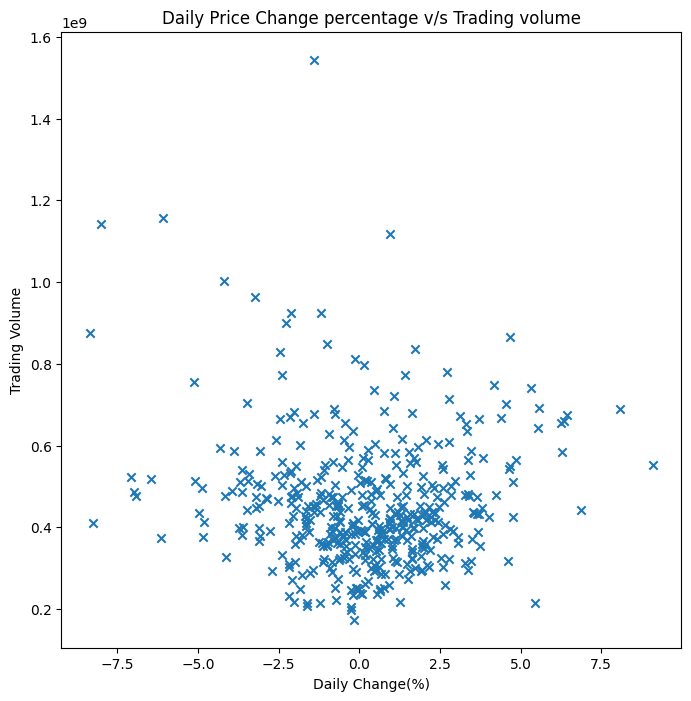

In [ ]:
# 9. Generate a scatter plot to visualize the correlation between trading volume and stock price movements.

# Getting the correlation score between the two columns
var_corr = var_dfStocks['Volume'].corr(var_DailyChangePercentage)
print(f"Correlation between Trading volume and Stock price movements:{var_corr}")

# Plotting
plt.figure(figsize=(8,8))
plt.scatter(var_DailyChangePercentage,var_dfStocks['Volume'], marker = 'x')
plt.title("Daily Price Change percentage v/s Trading volume")
plt.xlabel("Daily Change(%)")
plt.ylabel("Trading Volume")
plt.show()

# The correlation value and the random distribution of points in the plot, with no clear trend, indicate that the volume of stocks traded has little to no significant impact on the stock's price movements for that day.

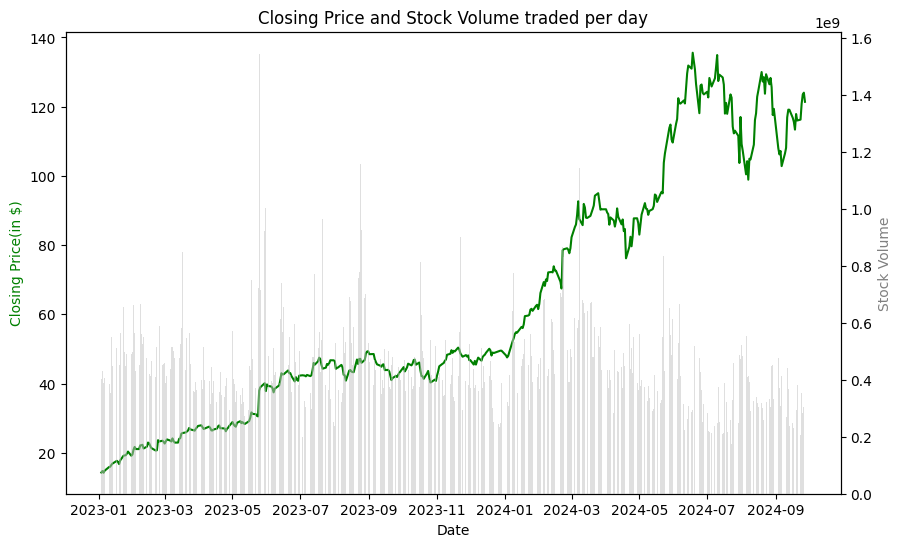

In [ ]:
# 10. Visualise the Stock price with the volume of stocks traded for each day

# Creating the figure and axis variable for the first plot
fig, axStock = plt.subplots(figsize=(10,6))

# Line plot for the stock
axStock.plot(var_dfStocks['Date'],var_dfStocks['Close'], color = 'green')
axStock.set_ylabel("Closing Price(in $)", color = 'green')
axStock.set_xlabel("Date")
axStock.set_title("Closing Price and Stock Volume traded per day")

# Creating the axis variable for the volume plot 
axVol = axStock.twinx()

# Bar plot for the Volume of stocks traded in order to show the frequency
axVol.bar(var_dfStocks['Date'],var_dfStocks['Volume'],alpha = 0.5,color='silver')
axVol.set_ylabel("Stock Volume", color = 'gray')

plt.show()

### From the graph, it can be observed that high trading volumes tend to occur in two key scenarios:
### - At the end of a steep price increase, suggesting that many investors might be selling stocks to earn profits on the new increase.
### - During periods of relative stability, possibly indicating that investors see a buying opportunity when prices are low and stable.